In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
MAY=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data5.txt',sep=',')
JUNE=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data6.txt',sep=',')
JULY=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data7.txt',sep=',')
AUGUST=pd.read_csv('C:/data/DACON/KRI-DAC_Jeju_data8.txt',sep=',')

In [2]:
# 데이터 확인
print(MAY.columns)
print(JUNE.columns)
print(JULY.columns)
print(AUGUST.columns)

Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type',
       'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')
Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type',
       'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')
Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'X', 'Y', 'FranClass',
       'Type', 'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')
Index(['OBJECTID', 'Field1', 'YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type',
       'Time', 'TotalSpent', 'DisSpent', 'NumofSpent', 'NumofDisSpent',
       'POINT_X', 'POINT_Y'],
      dtype='object')


In [3]:
# 병합을 위해 7월데이터에 필요없는 변수 제거 
JULY.drop(JULY[['X','Y']],axis=1,inplace=True)

In [4]:
# 사용하지 않을 1열,2열 제거
group=[MAY,JUNE,JULY,AUGUST]
for i in range(len(group)):
    group[i].drop(group[i].columns[[0,1]],axis=1,inplace=True)

In [5]:
# 데이터프레임 병합
GROUP= pd.concat([MAY,JUNE,JULY,AUGUST])

### 전체사용금액 대비 재난지원금사용량

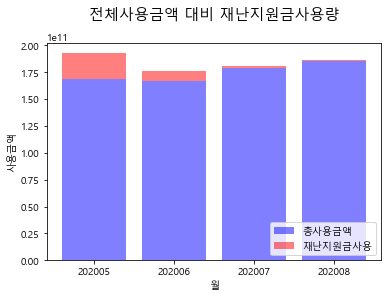

In [6]:
import numpy as np
GROUP_YM=GROUP.loc[:,['YM','TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].groupby(['YM'],as_index=False).sum()
label =['202005','202006','202007','202008']
N=len(GROUP_YM['YM'].unique())
index=np.arange(N)
alpha=0.5

p1=plt.bar(label,GROUP_YM['TotalSpent'],color='b',alpha=alpha)
p2=plt.bar(label,GROUP_YM['DisSpent'],color='r',alpha=alpha, bottom=GROUP_YM['TotalSpent'])
plt.title('전체사용금액 대비 재난지원금사용량\n', fontsize=15)
plt.ylabel('사용금액')
plt.xlabel('월')
plt.legend((p1[0],p2[0]),('총사용금액','재난지원금사용'),fontsize=10,loc=4)
plt.show()

In [7]:
GROUP.loc[:,['Type','TotalSpent','DisSpent','NumofSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=False).head(10)

,TotalSpent,DisSpent,NumofSpent,NumofDisSpent
Type,,,,
일반한식,119782556296,6026486130,3301893,184580
슈퍼마켓,54684011769,5275406519,2347107,212527
농축협직영매장,21775667800,2609627232,593005,65243
편의점,39477932065,2022731930,4938511,226371
주유소,33650643540,1962843870,766793,41326
농협하나로클럽,10409721850,1356168646,214102,25365
스포츠레져용품,11590067771,1340087205,160174,16126
약국,13437995166,1056396320,665424,58987
서양음식,26851921875,1006835289,1851230,73269


### 재난지원금 사용이 제한되는 업종 파악 

In [8]:
Type_sum=GROUP.groupby(['Type'],as_index=False).sum()
Type_sum[Type_sum['DisSpent']==0]['Type']

13             골동품점
14            골프경기장
15            골프연습장
17             공공요금
21              귀금속
32          기타대인서비스
35          기타비영리유통
55              노래방
60             단란주점
63            대학등록금
71              면세점
85            부동산분양
90     사무서비스(회원제형태)
95              상품권
98            성인용품점
102            손해보험
104           수입자동차
117        안마스포츠마사지
132            유흥주점
136           이륜차판매
139         인터넷Mall
140       인터넷종합Mall
159           조세서비스
169           중고자동차
181            칵테일바
198             항공사
Name: Type, dtype: object

### 재난지원금제도에 가장 영향이 큰 업종과 그렇지 않은 업종
- 일반한식 -> 슈퍼마켓 -> 농축협직영매장 -> 편의점 순으로 상위 업종 카테고리는 모두 식료품 관련 업종이라는 것을 알 수 있음
- 재난지원금 사용금액이 0인 업종은 제외하고 가장 낮은 금액에 업종을 파악함. 
- 기타광학품, 정보서비스, 카메라, 택시 업종들이 재난지원금제도에 가장 수혜를 못받고 있다는 것을 알 수 있음. 

In [9]:
    not_benefit=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=True).head(10)
benefit=GROUP[GROUP['DisSpent']!=0].loc[:,['Type','DisSpent','NumofDisSpent']].groupby(['Type'],as_index=True).sum().sort_values(by='DisSpent',ascending=False).head(10)

Text(0.5, 1.0, '업종별 재난지원금 사용금액 하위 10개')

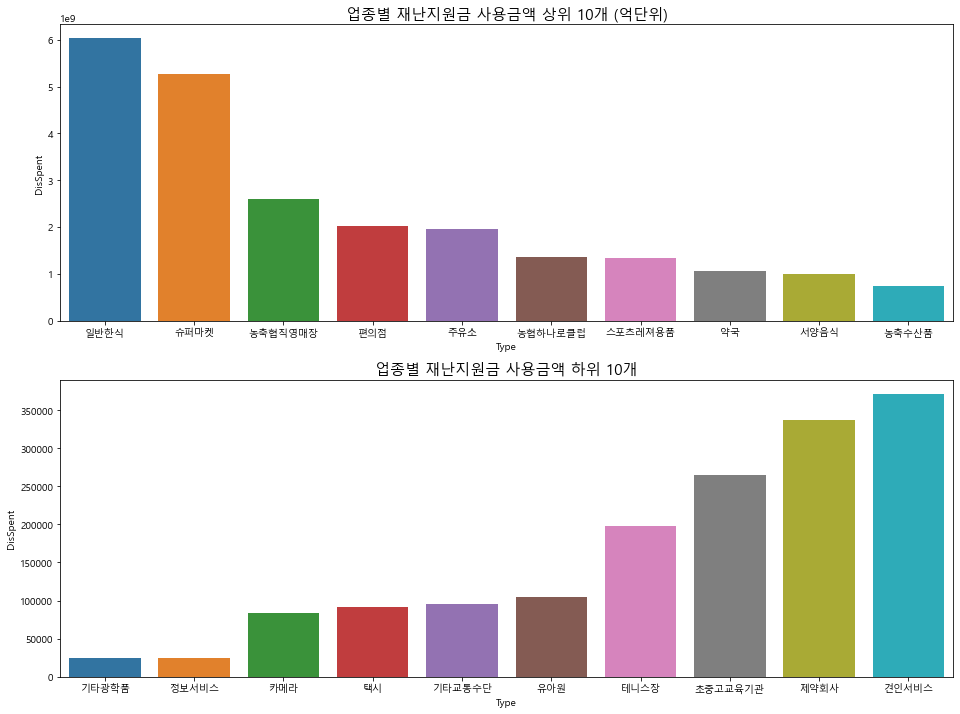

In [10]:
fig,ax = plt.subplots(2,1,figsize=(16,12))
sns.barplot(x=benefit.index,y=benefit['DisSpent'],ax=ax[0])
ax[0].set_title("업종별 재난지원금 사용금액 상위 10개 (억단위)",fontsize=15)
sns.barplot(x=not_benefit.index,y=not_benefit['DisSpent'],ax=ax[1])
ax[1].set_title('업종별 재난지원금 사용금액 하위 10개',fontsize=15)



### 업종별 재난지원금 월별 ( 5월~8월 ) 사용금액및 사용건수의 변화를 파악해봄
- 거의 모든 업종에서 5월 > 6월 > 7월 > 8월 사용금액이 점점 줄어드는 것을 알 수 있음
- 5월 1차 재난지원금이 지급 이후 재난지원금이 활발히 사용되었다고 볼 수 있다.
- 5월,6월달 재난지원금이 활발히 사용되었으며 상대적으로 7,8월은 적다는 것을 파악.

In [15]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf 
cf.go_offline(connected=True)

In [30]:
TEST=GROUP[GROUP['DisSpent']!=0].loc[:,['YM','Type','DisSpent','NumofDisSpent']]
@interact
def bar_plot(Type=sorted(list(TEST['Type'].unique()))):
    
    df=TEST[(TEST['Type']==Type)].pivot_table(index=['YM'],values=['DisSpent','NumofDisSpent'],aggfunc='sum')
    fig,ax = plt.subplots(2,1,figsize=(13,10))
    sns.barplot(x=df.index,y=df['DisSpent'],ax=ax[0])
    ax[0].set_title(Type+" 재난지원금 월별 사용금액 변화",fontsize=15)
    sns.barplot(x=df.index,y=df['NumofDisSpent'],ax=ax[1])
    ax[1].set_title(Type + ' 재난지원금 월별 사용횟수 변화',fontsize=15)

interactive(children=(Dropdown(description='Type', options=('1급호텔', '2급호텔', 'CATV', 'DVD음반테이프판매', 'LPG', '가례서비…

### 제주시 소상공인 비율 
- 영세소상공인 (연매출 3억미만)이 전체의 50%이상 이라는 것을 알 수 있음
- 영세 소상공인 업종 비율은 일반한식, 서양음식, 미용원, 스넥순으로 높은 것을 파악할 수 있다.

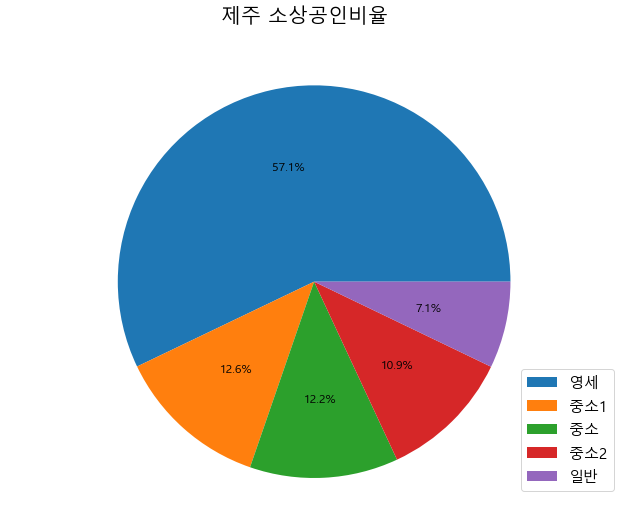

In [50]:
fig1, ax1=plt.subplots(figsize=(11,8))
fig1.suptitle('제주 소상공인비율', fontsize=20)
patches,texts,autotexts=ax1.pie(GROUP['FranClass'].value_counts(),autopct='%1.1f%%',textprops={'fontsize':12})
ax1.axis('equal')
ax1.legend(GROUP.FranClass.unique(), fontsize=15, loc=4)

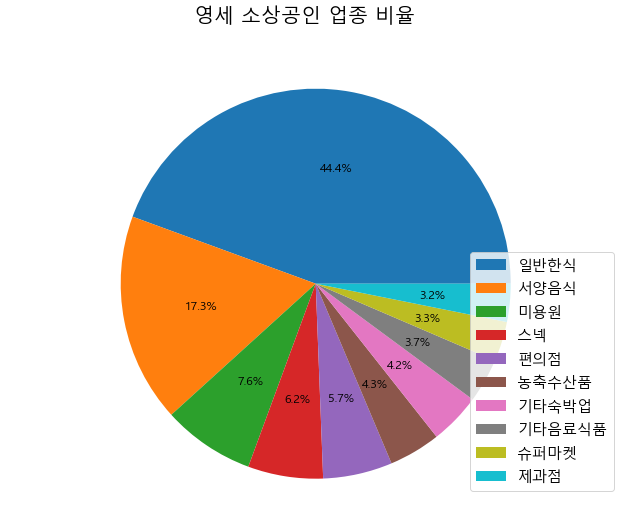

In [141]:
TEST=pd.DataFrame(GROUP[GROUP['FranClass']=='영세']['Type'].value_counts()).reset_index().head(10)
fig1, ax1=plt.subplots(figsize=(11,8))
fig1.suptitle('영세 소상공인 업종 비율', fontsize=20)
patches,texts,autotexts=ax1.pie(TEST['Type'],autopct='%1.1f%%',textprops={'fontsize':12})
ax1.axis('equal')
ax1.legend(TEST['index'], fontsize=15, loc=4)
